# Part I - (PROSPER LOAN DATA EXPLORATION)
## by (SAMUEL OFUOKWU)

## Introduction
> This dataset is the Prosper Loan dataset that records 113,937 entries of loans from to accounting for 81 variables, the purpose of this study is to explore the relationship between the variables and see which affects the amount of Loan a person is entitled to.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('prosperLoanData.csv')

In [3]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### What is the structure of your dataset?

> 81 columns and 113937 enteries

### What is/are the main feature(s) of interest in your dataset?

> CreditGrade, LoanOriginalAmount, Term of Loan, BorrowerRate, DebtToIncomeRatio are all feautures i consider as the main variables of intrest as i consider how they affect eachother and the relationship between them.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm interested in the factors that affect the LoanOriginalAmount and borrowerRate ascribed to each customer.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables of interest



In [5]:
#Create a copy of dataset
df_prosper = df.copy()

Creating a copy of the dataset so that various cleaning and wrangling can be done without affecting the original dataset.

In [6]:
#Merge the creditgrade column and the prosperrating column
df_prosper['CreditGrade'] = df['CreditGrade'].astype(str) + ''+ df_prosper ['ProsperRating (Alpha)']

In [7]:
#cleaning the creditgrade column and removing the string 'nan'
df_prosper['CreditGrade'] = df_prosper['CreditGrade'].str.replace('nan','')

In [8]:
df_prosper['CreditGrade'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: CreditGrade, dtype: int64

The CreditGrade column is only applicable for loans before 2009 it wouldn't be a fair analysis if loans after 2009 were not acknowledged the ProsperRating (Alpha) column is applicable for loans after july 2009, so I merged the two columns and cleaned so the dataset is well represented in the creditgrade column. 

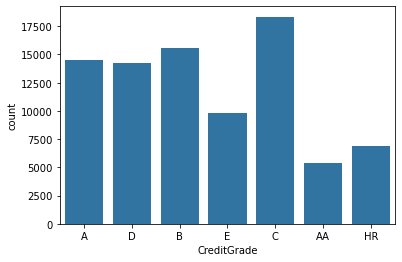

In [9]:
default_color = sns.color_palette()[0]
sns.countplot(data= df_prosper,x = 'CreditGrade',color =default_color);


The arrangement of the CreditGrade is not right, as it should be arranged from worst to best CreditGrade. The creditgrade arranged from worst to best are as follows: 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. So beleow i'm going to convert the creditgrade column into an ordered category.

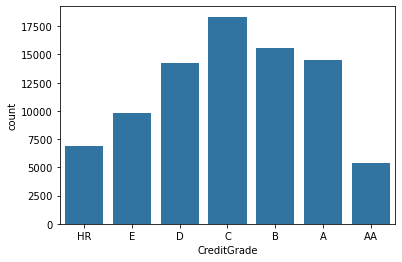

In [10]:
# Create a list called cats 
cats = ["HR",'E','D','C','B','A','AA']
# Import CategoricalDtype function
from pandas.api.types import CategoricalDtype
#assign ordered category to cat_type
cat_type = CategoricalDtype(categories = cats,ordered = True)
#Convert creditgrade column to an ordered category
df_prosper['CreditGrade']= df_prosper['CreditGrade'].astype(cat_type)
#Plot the creditgradecolumn
sns.countplot(data= df_prosper,x = 'CreditGrade',color =default_color);

According to the visualization above the creditgrade category with the most enteries is the 'C' category which also seems to be the middle category. The AA category has the fewest number of people in that category.

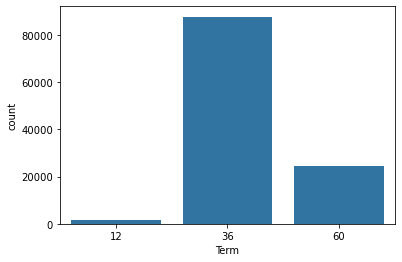

In [11]:
#Plot the term of loan 
sns.countplot(data= df,x = 'Term',color =default_color);

The visualization above shows that most loans have a duration of 36 months that is 3 years.

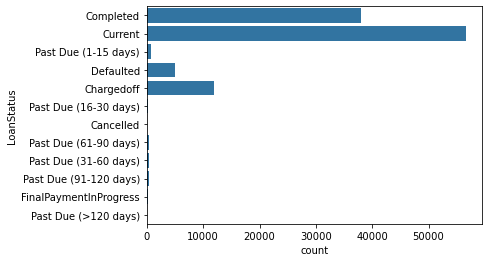

In [12]:
#Plot the Loanstatus column
sns.countplot(data= df,y = 'LoanStatus',color =default_color);

The visualization above shows the status ofthe loan off each entry with those  that are still paying the loan the most of them.

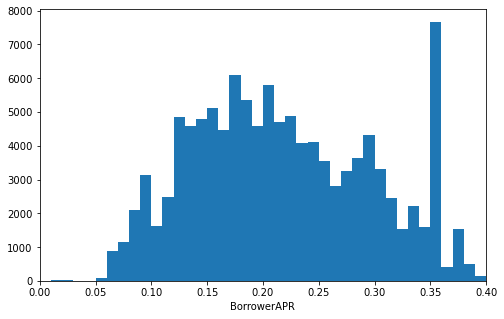

In [13]:
# plotting BorrowerAPR on a standard scale
binsize = 0.01
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('BorrowerAPR')
plt.show()

Above is the histogram distribution of the frequency of the BorrowerApr of each entry

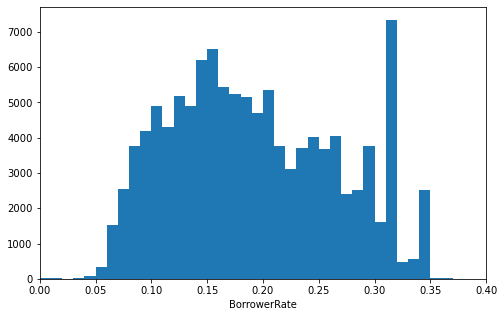

In [14]:
# plotting BorrowerRate on a standard scale
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('BorrowerRate')
plt.show()

Above is the histogram distribution of the frequency of the BorrowerRate of each entry we can see that it has a first peak at 15 and another at 32% and is very similar to the BorrowerAnnual percentage rate per entry.

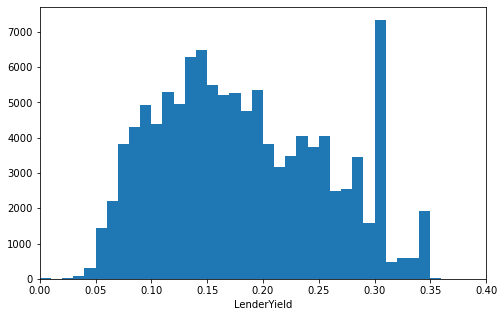

In [15]:
# plotting Lenderyeild on a standard scale
binsize = 0.01
bins = np.arange(0, df['LenderYield'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LenderYield', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('LenderYield')
plt.show()

The Lenderyield has a very similar distribution to borrowerannual percentage and Borrowerrate. 

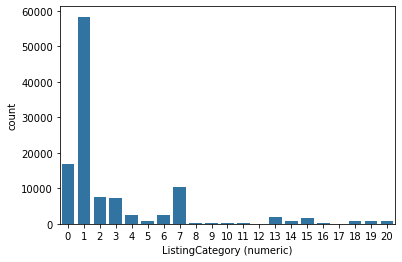

In [16]:
sns.countplot(data= df_prosper,x = 'ListingCategory (numeric)',color =default_color);

The category representation of the visualization above connotes  the listing that the borrower selected when posting their listing are as follows: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans. According to the representation above most people were taking loans for DebtConsolidation.

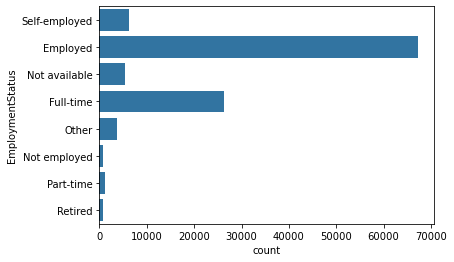

In [17]:
sns.countplot(data= df_prosper,y = 'EmploymentStatus',color =default_color);

The visualization above shows that majorly employed people have significantly more loans in the dataset.

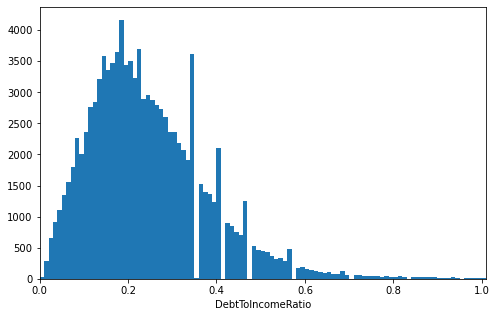

In [18]:
# plotting DebtToIncomeRatio on a standard scale
binsize = 0.01
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1.01])
plt.xlabel('DebtToIncomeRatio')
plt.show();

The histogram representation of the distribution of the Debttoincome ratio is a righttail distribution, it peaked around 0.2 meaning majorly most people that have approved loan has a healthy debt to income ratio.

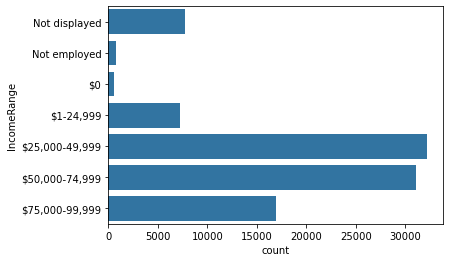

In [19]:
cats = ['Not displayed','Not employed',"$0",'$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories = cats,ordered = True)
df_prosper['IncomeRange']= df_prosper['IncomeRange'].astype(cat_type)
sns.countplot(data= df_prosper,y = 'IncomeRange',color =default_color);

The visualization above is a countplot that shows the frequency of loanees and their income range and it is visible that loanees within the income range of 25,0000 -49,999 dollars accounts for the most occuring Income Range category in the dataset. Most loanees had an incomw range of 25,000 - 74,999 dollars.

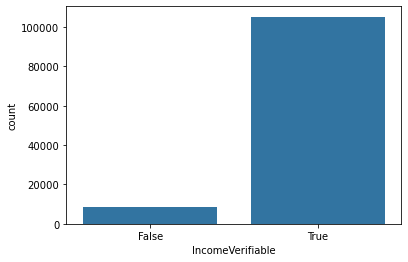

In [20]:
sns.countplot(data= df_prosper,x = 'IncomeVerifiable',color =default_color);

Most loan approved have verified the means of income stated by the loan customer.

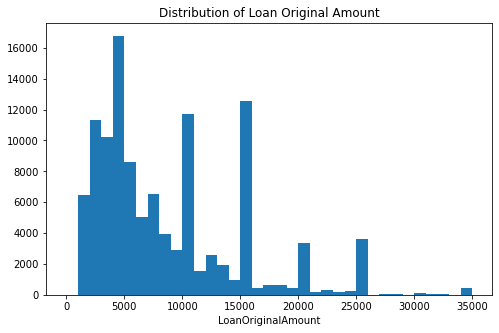

In [21]:
# plotting LoanOriginalamount on a standard scale
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Original Amount')
plt.xlabel('LoanOriginalAmount')
plt.show()

Above shows the visual representation of the Loan amount disbursed to succesful loan applicants, we see that the 5,000 amount have the most approval and disburments than the rest,which make sense as you would imagine the higher the price the higher the requirements for the loan. It is much easier to geta loan of 5,000 than to get a loan of 35,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I'm concerned about the variables and categories that affect total Loan amount disbursed to loanees and the borrowerrate ascribed to them.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The CreditGrade column needed to be arranged from worst to best and it was first randomly plotted and then I had to convert it to an ordered categorybefore getting the countplot

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the prosperloan
dataset that have already been explored in the univariate section.

In [22]:
numeric_var =  [ 'BorrowerAPR','BorrowerRate','LenderYield','DebtToIncomeRatio']
category_var = ['CreditGrade','Term']

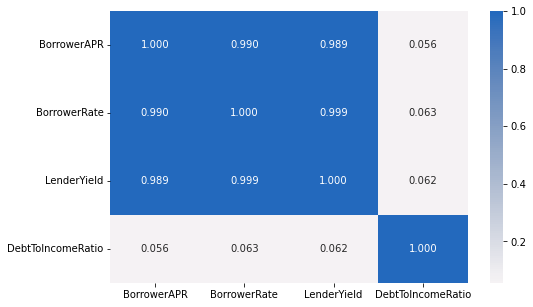

In [23]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There is a very strong correlation between BorrowerRate,BorrowerAnnualPercentageRate and Lenderyield,this thereby indicate that all these variables affect each other. We have something peculiar here, the DebtToIncome ratio column shares a relatively weak correlation with the other variables.

<Figure size 1080x1080 with 0 Axes>

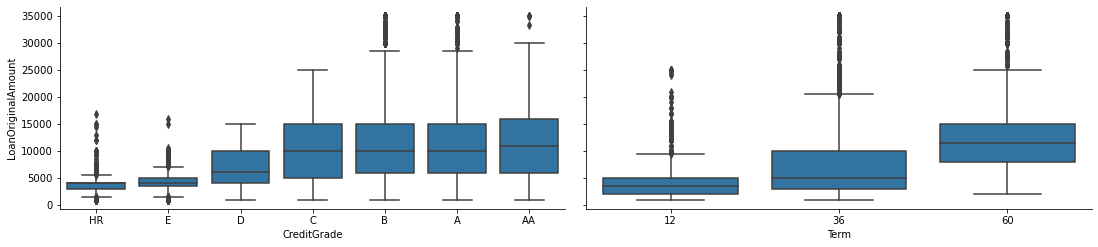

In [24]:
#Creating a boxplot function called boxgrid
def boxgrid(x, y, **kwargs):
    """ Creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize=(15,15))
#Plotting a pairgrid using the boxplot function
g = sns.PairGrid(data = df_prosper, y_vars = ['LoanOriginalAmount'], x_vars = category_var,
                height = 3.5, aspect = 2.2)
g.map(boxgrid);
plt.show()

The visualization above shows a boxplot of two categorical variables and their relationship with the loan amount that was disbursed to the loanees. The first visualization from the left shows something interesting the higher the credit grade the higher the average Loan distributed,so we can state judging from the visualizations customers with higher creditgrade have access to higher loans.The visualization on the right shows the longer the term of loan the higher the loan amount disbursed.

<Figure size 1440x1440 with 0 Axes>

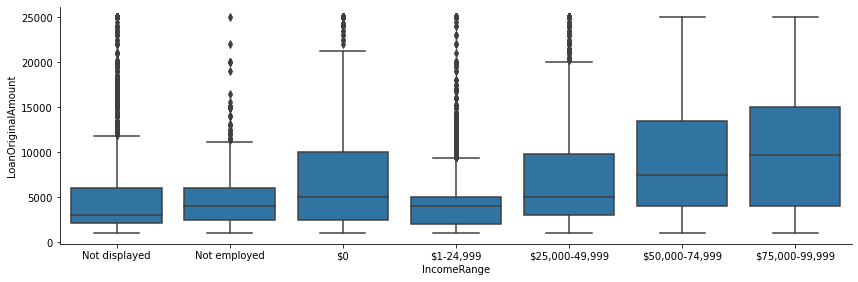

In [25]:
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = df_prosper, y_vars = ['LoanOriginalAmount'], x_vars = 'IncomeRange',
                height = 4, aspect = 3)
g.map(boxgrid)
plt.show();

The income range is also another important factor when it comes to allocation of loans, according to the visualization above the higher the income range the higher the loan. The boxplot shows the average Loan amount allocated to different Income category.

<Figure size 1440x1440 with 0 Axes>

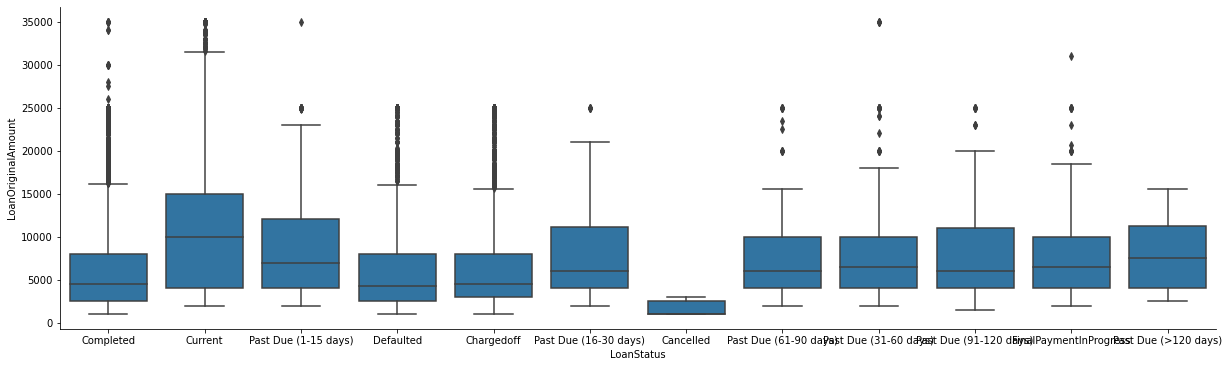

In [26]:
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = df, y_vars = ['LoanOriginalAmount'], x_vars = 'LoanStatus',
                height = 5.2, aspect = 3.3)
g.map(boxgrid)
plt.show();

The visualization above shows a box plot of the LoanorginalAmount per Loan status we see most completed loans are in and around the 5,000 dollars mark, we can therefore say that small amounts are more likely to get completed than larger amounts.

<Figure size 1440x1440 with 0 Axes>

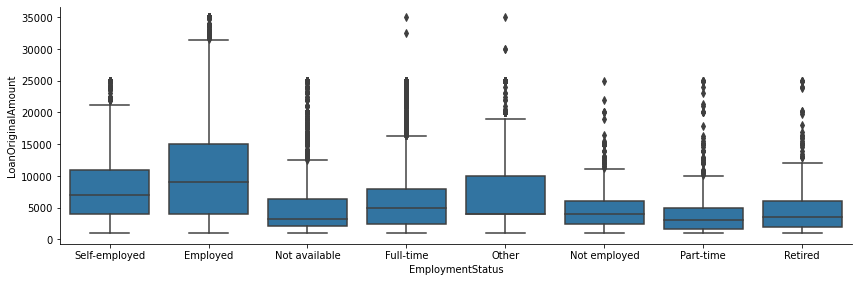

In [27]:
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = df, y_vars = ['LoanOriginalAmount'], x_vars = 'EmploymentStatus',
                height = 4, aspect = 3)
g.map(boxgrid)
plt.show();

The visualization above shows the bivariate relationship between Loan Original Amount and Employment status. We can see that that gainfully employed loanees tend to get higher loans than people without employment.

<Figure size 720x720 with 0 Axes>

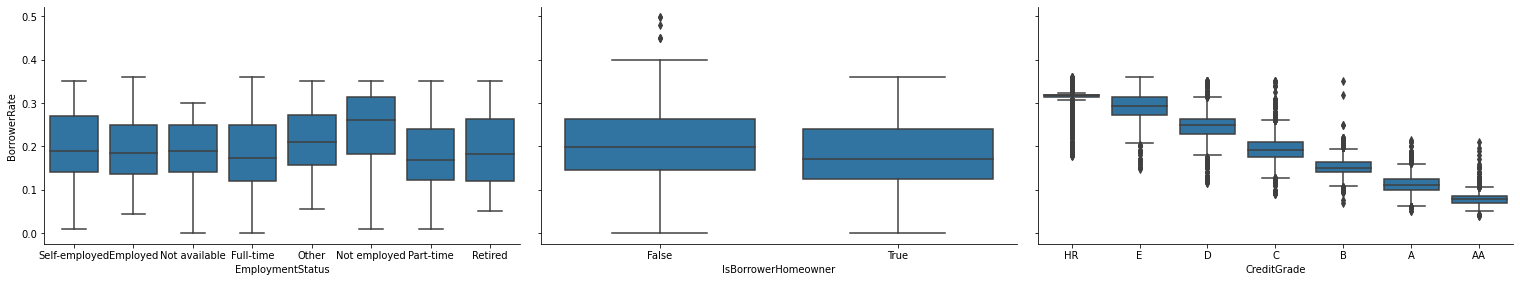

In [28]:
plt.figure(figsize = [10,10])
g = sns.PairGrid(data = df_prosper, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner','CreditGrade'],
                height = 4, aspect = 1.8)
g.map(boxgrid)
plt.show()

The visualization above shows a pair grid showinng the borrower rate accross three categories. From the first visualization unemployed people usually have a significantly higher borrower rate. The second diagram shows that home owners have lower borrower rates than people without homes. And finally the lower the creditgrade the higher the borrower rate.

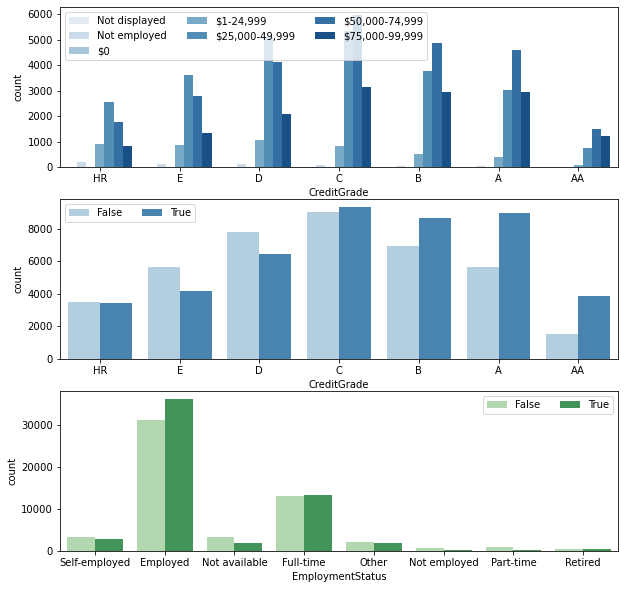

In [29]:
plt.figure(figsize = [10, 10])

# subplot 1: CreditGrade vs IncomeRange
ax = plt.subplot(3, 1, 1)
sns.countplot(data = df_prosper, x = 'CreditGrade', hue = 'IncomeRange', palette = 'Blues')
ax.legend(loc =2 , ncol = 3) 
# subplot 2: CreditGrade vs IsBorrowerHomeowner
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_prosper, x = 'CreditGrade', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: EmploymentStatus vs IsBorrowerHomeowner, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_prosper, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

The first visualization shows that customers with a creditgrade of AA havethe largest number of high income earners falling between 75,000 - 99,999 dollars. They also have a very low number of customers who have not revealed their income range. The second visualization shows the number of loanees in each creditgrade with or without a home and the HR creditgrade which is lowest grade had the highest proportion of loanees without a home and loanees in the AA credit grade which is the highest have the highest proportion of home owners. Int he last visualization we see that most homeowners are gainfully employed.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between creditgrade and borrower rate and loan amount is very interesting. The borrowerate reduces when the creditgrade increases, loanees with high creditgrade have low borrower rates compared to loanees with low credit grade. The higher the creditgrade the higher access to high amounts of loan. Home owners tend to be more frequent in higher CreditGrades and have access to higherloans. 


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

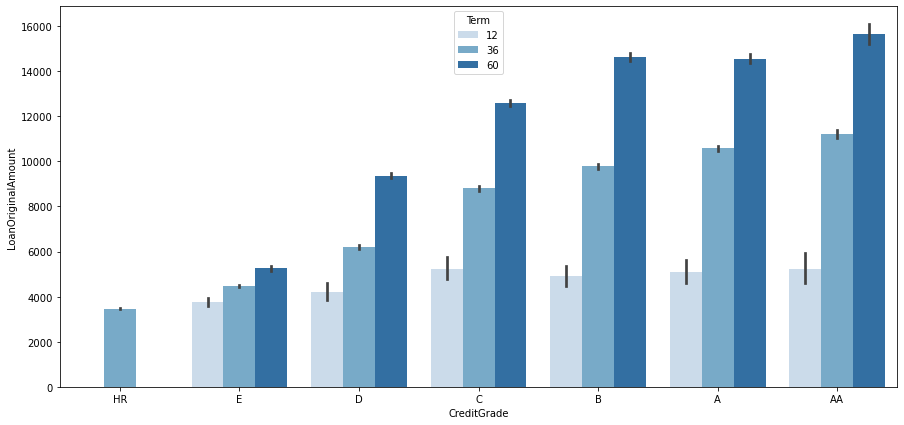

In [30]:
plt.figure(figsize = [15,7])
sns.barplot(data = df_prosper, x = 'CreditGrade',y='LoanOriginalAmount', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) ;

According to the visualization above we can see the Term of loan accross all the creditgrade and the loan amount they were able to have access to on an average. Firstly, the Loan Amount tends to increase per creditgrade but that isn't all we can see that the term of Loan is also a factor within respective creditgrades where loans with 36 months have higher loan amounts than those with 12 months or 24 months on an average.

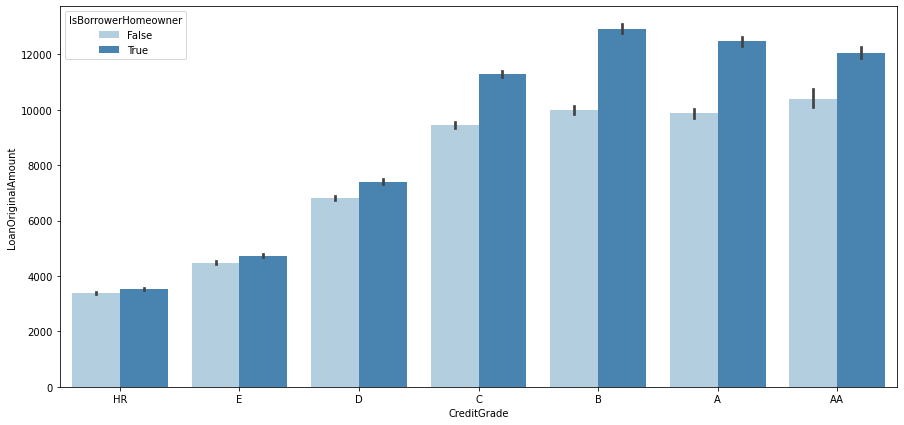

In [31]:
plt.figure(figsize = [15,7])
sns.barplot(data = df_prosper, x = 'CreditGrade',y='LoanOriginalAmount', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2); 

The visualization above is an intresting one Home owners even within creditgrades have higherloans than people without homes.

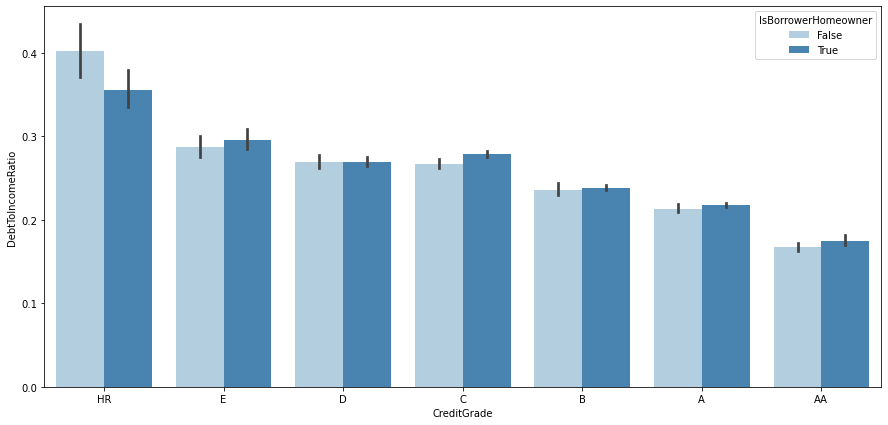

In [32]:
plt.figure(figsize = [15,7])
sns.barplot(data = df_prosper, x = 'CreditGrade',y='DebtToIncomeRatio', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2); 

The debt to income ratio reduces with increase to creditgrade this shows the very huge reliance of income range when giving out loans to loan applicants. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Income range is a very significant factor in the allocation of creditgrades and also Loan amount disbursed, it is a very important feauture before loan disbursement.

### Were there any interesting or surprising interactions between features?

> It was thereby suprising that homeowners across creditgrades have higher debt to income ratio than non-home owners.

## Conclusions
>During the course of my analytical and exploratory process I realised that there are certain factors that are considered before a specific amount of loan is given to a customer. Only loanees with high creditgrade had access to high loan amounts.

>There were specific feautures I noticed about Loanees with high grades they have high proportion of home owners, they have relatively higher incomerange, they are mostly employed, They have lower borrower rate, they have high loan amounts i believe these factors were considered before filtering the loanees into creditgrades.

> I also discovered that lower loans have higher tendecy to be completed than higher loan amounts.

> Home owners have tendency to have higher creditgrades and also higher loans.



